In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
beta  = 20;                                                                # Infections per year, per infectious case
gamma = 1;                                                                 # Rate of cure, through treatment or self-cure
u     = 0.0826;                                                            # Hazard rate of reactivation from latent 'fast' infection
v     = 0.0006;                                                            # Hazard rate of reactivation from latent 'slow' infection
w     = 0.872;                                                             # Hazard rate of stabilising from latent 'fast' to 'slow' status
muTB  = 1/6;                                                               # Hazard rate of death from TB
mu    = 1/70;                                                              # Background mortality hazard

seed = 10**(-6); init = [1-seed, seed, 0, 0, 0, 0];                                 # Introducing a perturbation ('seed') to the disease-free equilibrium

Text(0, 0.5, 'Incidence per 100,000 population')

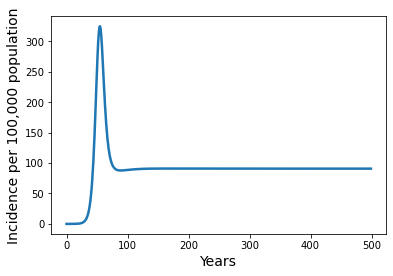

In [2]:
def goveqs(y,t, beta, gamma, u, v, w, muTB, mu):
    
    #Function defining the governing equations (local gradient)
    #y:    state vector at time 't'
    #t:     time (not actually used in the current governing equations, but kept as placeholder)
    #dydt:   vector of first derivatives for each compartment

    
    #Initialise the output vector
    dydt = np.zeros(len(y));
    U  = y[0];
    Lf = y[1];
    Ls = y[2];
    I  = y[3];
    R  = y[4];
    J  = y[5];
    N  = U+Lf+Ls+I+R;

    # Set up the governing equations
    dUdt = -beta*U*I/N + mu*N + muTB*I - mu*U;                               # dU/dt
    dLfdt = beta*U*I/N - (u + w + mu)*Lf;                                     # dLf/dt
    dLsdt = w*Lf - (v + mu)*Ls;                                               # dLs/dt
    dIdt = u*Lf + v*Ls - (mu + muTB + gamma)*I;                              # dI/dt
    dRdt = gamma*I - mu*R;                                                   # dR/dt
    dJdt = u*Lf + v*Ls;                                                      # dJ/dt

    dydt = [dUdt, dLfdt, dLsdt, dIdt, dRdt, dJdt]
    return dydt

#Solve the model, plotting incidence over time
geq = lambda y,t: goveqs(y,t, beta, gamma, u, v, w, muTB, mu);               # Function handle to goveqs, allowing us to fix model parameters when running the simulation
soln = odeint(geq,init,np.arange(0, 500+1, 1))                                      # Simulating the epidemic for 500 years, to equilibrium

tb_df = pd.DataFrame(soln, columns = ['U', 'Lf', 'Ls', 'I', 'R', 'J'])

a=tb_df['J']
Incidence=np.multiply([x - a[i - 1] for i, x in enumerate(a) if i > 0],1e5)
plt.plot(range(500),Incidence, linewidth = 2.5)
plt.xlabel("Years", size=14)
plt.ylabel("Incidence per 100,000 population", size=14)